In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCH = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ML projects/potato disease/PlantVillage",
    shuffle =True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE) ,
    batch_size = BATCH_SIZE,
    seed = 42,


)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# plt.figure(figsize=(10,10))
# for image_batch, label_batch in dataset.take(1):

#   for i in range(12):
#     ax = plt.subplot(3,4,i+1)

#     plt.imshow(image_batch[i].numpy().astype('uint8'))
#     plt.title(class_names[label_batch[i]])
#     plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds,train_split =0.8,val_split = 0.1 , test_split =0.1,shuffle = True,shuffle_size = 2000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size,seed = 12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds, val_ds , test_ds

In [ ]:
train_ds ,val_ds ,test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(3 , activation = 'softmax'),


])

model.build(input_shape= (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 32)          0         
 ng2D)                                                

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs =EPOCH,
    batch_size = BATCH_SIZE,
    verbose =1,
    validation_data = val_ds,

)

Epoch 1/50
54/54 [==============================] - 14s 112ms/step - loss: 0.8945 - accuracy: 0.5035 - val_loss: 0.7636 - val_accuracy: 0.6510
Epoch 2/50
54/54 [==============================] - 3s 50ms/step - loss: 0.7249 - accuracy: 0.6765 - val_loss: 0.7334 - val_accuracy: 0.6719
Epoch 3/50
54/54 [==============================] - 3s 49ms/step - loss: 0.6089 - accuracy: 0.7471 - val_loss: 0.4194 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 3s 50ms/step - loss: 0.3731 - accuracy: 0.8547 - val_loss: 0.3517 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 3s 49ms/step - loss: 0.3351 - accuracy: 0.8588 - val_loss: 0.2488 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 3s 48ms/step - loss: 0.2622 - accuracy: 0.8993 - val_loss: 0.2537 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 3s 50ms/step - loss: 0.2436 - accuracy: 0.9028 - val_loss: 0.2122 - val_accuracy: 0.9219
Epoch 8/50


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

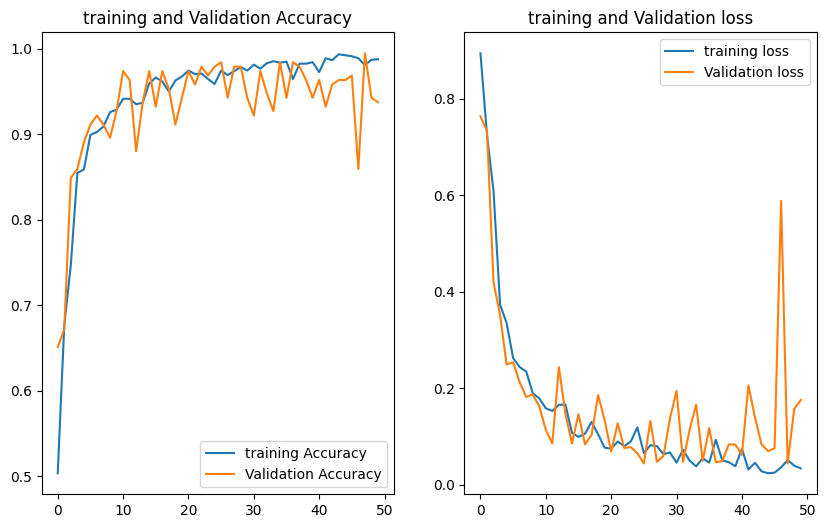

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label = 'training Accuracy')
plt.plot(range(EPOCH),val_acc,label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCH),loss,label = 'training loss')
plt.plot(range(EPOCH),val_loss,label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('training and Validation loss')

plt.show()

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 4s 21ms/step - loss: 0.1928 - accuracy: 0.9336


[0.1927654892206192, 0.93359375]

In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return predicted_class , confidence

In [ ]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class , confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f'Actual: {actual_class} , \n Predicted: {predicted_class} \n Confidence: {confidence}%')

    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

model.save(f"/content/drive/MyDrive/ML projects/potato disease/Models/first")